In [1]:
import numpy as np
import scipy as sp
from scipy.stats import uniform
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)
from sklearn.metrics import log_loss
np.random.seed(1)

In [2]:
N = 50
D = 50
X = uniform.rvs(-5,10,(N,D))
# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))
Y = np.round(sp.special.expit(X.dot(true_w) +  np.random.randn(N)*0.5))
Y

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.])

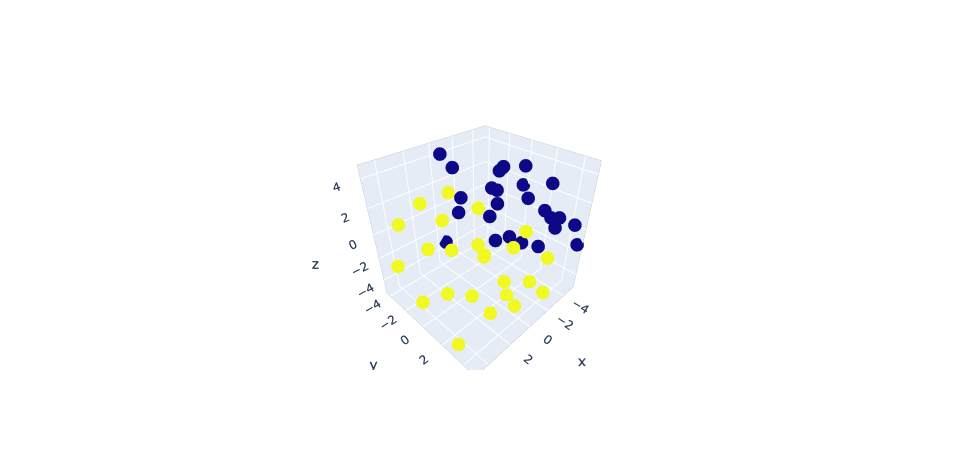

In [3]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0],y=X[:,1],z=X[:,2],mode ='markers',marker=dict(color=Y)))
fig.show()

In [4]:
costs = []
l = 0.001
reg_lambda = 3.0
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
for i in range(5000):
    y_pred = sp.special.expit(X.dot(w))
    w = w + l*((Y - y_pred).dot(X) - reg_lambda*np.sign(w))
    costs.append(-(Y*np.log(y_pred) + (1-Y)*np.log(1 - y_pred)).mean() + reg_lambda*np.abs(w).mean())
print(w)


[ 1.06009823e+00  4.47540523e-01 -4.56534686e-01 -2.79940184e-03
 -4.82165440e-04 -2.85784910e-04  1.66305757e-04  5.66373696e-04
  1.65127591e-01  2.82376249e-03 -1.02621710e-03 -1.46289189e-03
 -3.03240499e-03 -5.66971934e-04 -3.27660477e-03 -8.34827993e-04
 -1.29817412e-03 -2.24237662e-03  8.59687703e-04 -2.26263852e-03
 -1.53480701e-03 -1.50866454e-03  3.37513460e-03  3.36164836e-02
  4.36432982e-04  3.24385356e-03 -8.80747151e-02 -9.10936195e-04
 -1.09291670e-01 -1.70588603e-03 -2.35212844e-03  2.16254062e-04
 -5.43942806e-03  3.05174898e-03  2.55714634e-03  7.49450524e-04
  3.17809023e-03 -1.13584605e-03  2.47202083e-03  1.83929604e-03
  1.22592774e-03 -3.51851658e-03 -5.19113723e-03 -2.13260454e-03
 -3.45632923e-03  9.00331572e-04  2.41408259e-03  1.25144533e-03
 -1.66972597e-03 -3.93213291e-02]


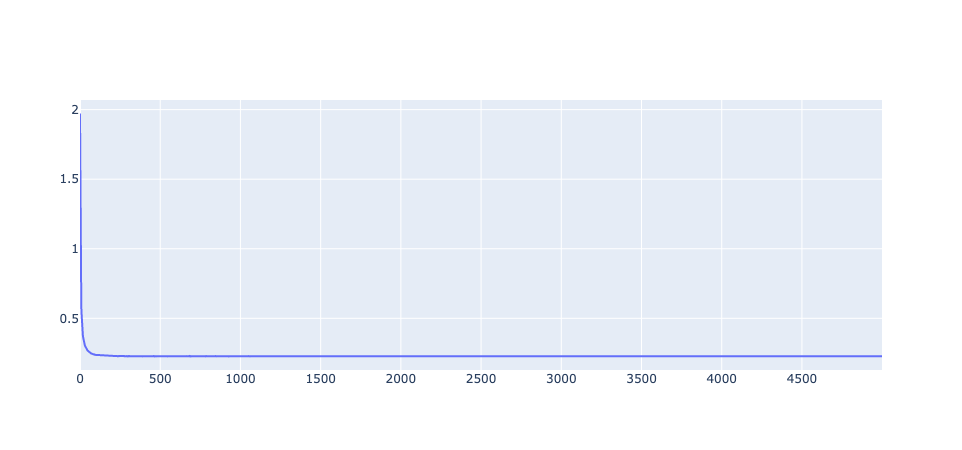

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=costs,mode ='lines'))
fig.show()

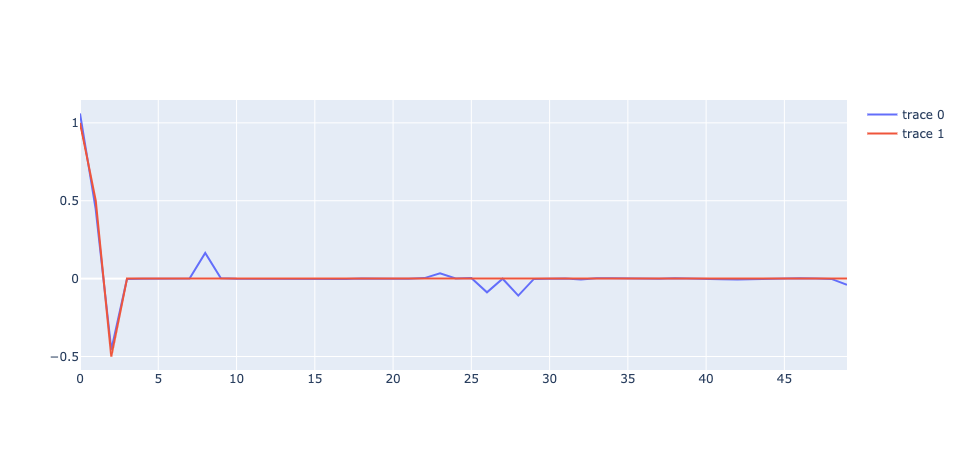

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=w,mode ='lines'))
fig.add_trace(go.Scatter(y=true_w,mode ='lines'))
fig.show()